---

# 0. Machine Learning with Python 1 (Project 1, Linear Regression)

# Goal: 

## Finding the relationship between fuel consumption and co2 emission of a car

# _00. Import Main Libraries_

# _01. Load the Data and Explore the Basics of It_

# _02. Plot the Selected Data_

# _03. Training, Testing and Some Evaluation_

# _04. Cross-Validation for Multiple Linear Reg_

# _05. A Pipeline_

---
---
---

# _00. Import Main Libraries_

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import pylab as pl

import numpy as np

%matplotlib inline

# _01. Load the Data_

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# select some features to explore more

df1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# _02. Plot the Selected Data_


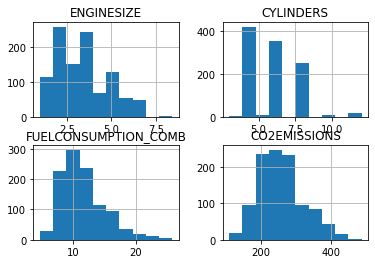

In [5]:
# hist plot

df1.hist()

plt.show()

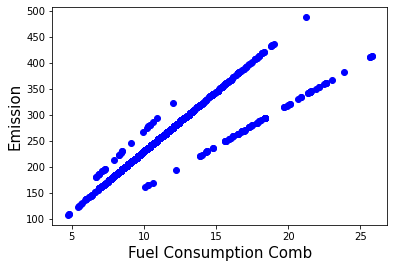

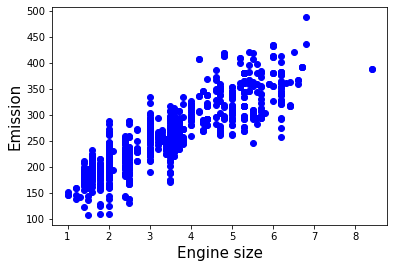

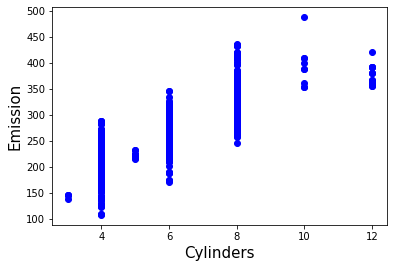

In [6]:
# scatter plots of predictor vs target var

plt.scatter(df1.FUELCONSUMPTION_COMB, df1.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption Comb", fontsize = 15)
plt.ylabel("Emission", fontsize = 15)
plt.show()

plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size", fontsize = 15)
plt.ylabel("Emission", fontsize = 15)
plt.show()

plt.scatter(df1.CYLINDERS, df1.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders", fontsize = 15)
plt.ylabel("Emission", fontsize = 15)
plt.show()

In [7]:
# import seaborn package for regplots

import seaborn as sns

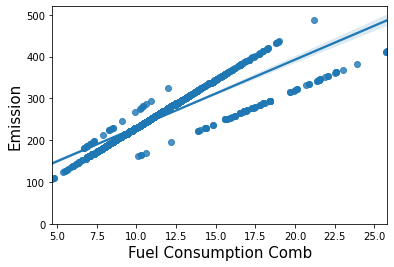

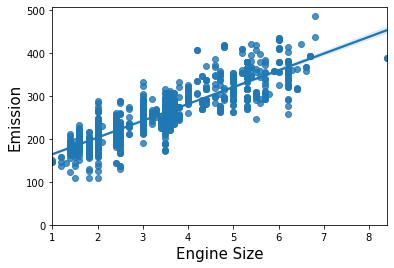

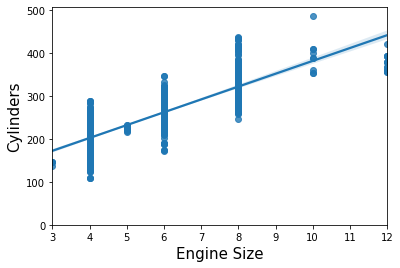

In [8]:
# scatter plots of predictor vs target var

sns.regplot(x="FUELCONSUMPTION_COMB", y = "CO2EMISSIONS", data = df1)
plt.ylim (0,)
plt.xlabel("Fuel Consumption Comb", fontsize = 15)
plt.ylabel("Emission", fontsize = 15)
plt.show()

sns.regplot(x="ENGINESIZE", y = "CO2EMISSIONS", data = df1)
plt.ylim (0,)
plt.xlabel("Engine Size", fontsize = 15)
plt.ylabel("Emission", fontsize = 15)
plt.show()

sns.regplot(x="CYLINDERS", y = "CO2EMISSIONS", data = df1)
plt.ylim (0,)
plt.xlabel("Engine Size", fontsize = 15)
plt.ylabel("Cylinders", fontsize = 15)
plt.show()

# _03. Scaling, Training and Testing_

In [9]:
# import for lin reg model

from sklearn.linear_model import LinearRegression

# import for train and test split

from sklearn.model_selection import train_test_split

In [10]:
# apply train and test split

x_data=df1.drop('CO2EMISSIONS',axis=1)

y_data = df1[["CO2EMISSIONS"]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

print("number of training samples:",x_train.shape[0])
print("number of test samples :", x_test.shape[0])

number of training samples: 853
number of test samples : 214


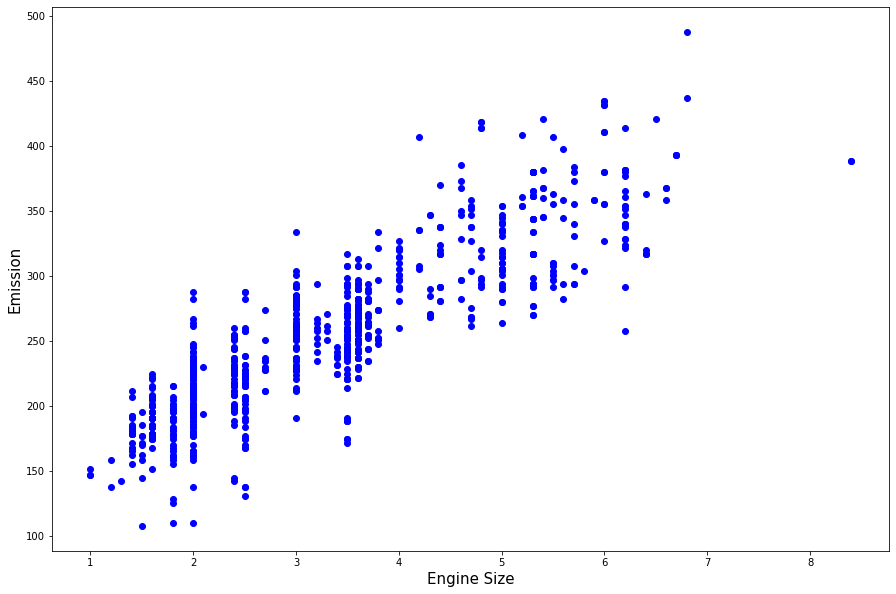

In [11]:
# scatterplot of Engine Size vs Emission

# plt.title(Title)

width = 15
height = 10
plt.figure(figsize=(width, height))

plt.scatter(x_train.ENGINESIZE, y_train,  color='blue')
plt.xlabel("Engine Size", fontsize = 15)
plt.ylabel("Emission", fontsize = 15)
plt.show()

(88.0, 508.0)

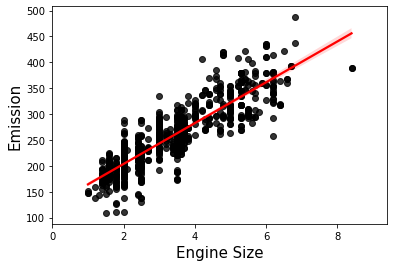

In [12]:
# regplot of the same data
# we can add marker="+"

sns.regplot(x=x_train.ENGINESIZE, y = y_train,  scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.xlabel("Engine Size", fontsize = 15)
plt.ylabel("Emission", fontsize = 15)
plt.xlim(0,max(x_train.ENGINESIZE)+1)
plt.ylim(min(y_train.CO2EMISSIONS)-20,max(y_train.CO2EMISSIONS)+20)

In [13]:
# scaling for training predictors

from sklearn.preprocessing import MinMaxScaler

MinMaxScaler1 = MinMaxScaler()

x_train1 = MinMaxScaler1.fit_transform(x_train)

x_train1 = pd.DataFrame(x_train1, columns = x_train.columns)

x_train1

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,0.270270,0.333333,0.366667
1,0.729730,0.555556,0.433333
2,0.202703,0.111111,0.228571
3,0.513514,0.555556,0.438095
4,0.405405,0.555556,0.376190
...,...,...,...
848,0.081081,0.111111,0.190476
849,0.202703,0.111111,0.138095
850,0.513514,0.555556,0.380952
851,0.189189,0.111111,0.280952


In [14]:
# scaling for training target var

MinMaxScaler2 = MinMaxScaler()

y_train1 = MinMaxScaler2.fit_transform(y_train)

y_train1 = pd.DataFrame(y_train1, columns = y_train.columns)

y_train1

,CO2EMISSIONS
0,0.465789
1,0.550000
2,0.289474
3,0.557895
4,0.478947
...,...
848,0.242105
849,0.176316
850,0.484211
851,0.357895


In [15]:
# lin reg object

lre = LinearRegression()

In [16]:
# fit the lre object with the train set

lre.fit(x_train1[["ENGINESIZE"]], y_train1)

# The coefficients
print ('Coefficients: ', lre.coef_)
print ('Intercept: ', lre.intercept_)

Coefficients:  [[0.76756256]]
Intercept:  [0.14785782]


In [17]:
# scaling (only transform, not fit_transform) for test vars

x_test1 = MinMaxScaler1.transform(x_test)

x_test1 = pd.DataFrame(x_test1, columns = x_test.columns)

y_test1 = MinMaxScaler2.transform(y_test)

y_test1 = pd.DataFrame(y_test1, columns = y_test.columns)

In [18]:
# predict the test data with fitted line

y_test_hat1 = lre.predict(x_test1[["ENGINESIZE"]])

# if you want the input data as an array, you can use: test_x = np.asanyarray(x_test[["ENGINESIZE"]])

In [19]:
# inverse scale transform

y_test_hat = MinMaxScaler2.inverse_transform(y_test_hat1)

In [20]:
# find mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_test_hat)

mae

23.206541542107978

In [21]:
# find mean square error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_hat)

mse

955.3707648173706

In [22]:
# calculate r^2 with test data

score1 = lre.score(x_test1[["ENGINESIZE"]], y_test1)

print(score1)

0.7644809223805962


In [32]:
# calculate r^2 with training data

score1 = lre.score(x_train1[["ENGINESIZE"]], y_train1)

print(score1)

0.7639480562303456


In [25]:
# imports for Cross-Val

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict

In [59]:
# prediction with cross_val

yTestHat1 = cross_val_predict(lre, x_test1, y_test1,cv=5)

yTestHat = MinMaxScaler2.inverse_transform(yTestHat1)

yTestHatDf = pd.DataFrame(yTestHat)

yTestHatDf.columns = ["Predictions"]

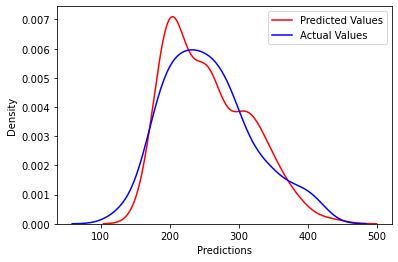

In [60]:
# plot with cross_val predictions

ax1 = sns.kdeplot(x = yTestHatDf.Predictions, color = 'r', label = "Predicted Values") 

sns.kdeplot(x = y_test.CO2EMISSIONS, color = "b", label = "Actual Values", ax = ax1 )

plt.legend()

In [61]:
# cross-validation

Rcross = cross_val_score(lre, x_test1, y_test1, cv=5)

# mean and std

print("The mean of the r^2 of the folds: ", Rcross.mean(), "\nThe standard deviation: " , Rcross.std())

The mean of the r^2 of the folds:  0.8521764688937946 
The standard deviation:  0.018312833241984024


In [62]:
# mse

mse_of_the_folds = -1 * cross_val_score(lre,x_test1, y_test1,cv=5,scoring='neg_mean_squared_error')

mean_mse = mse_of_the_folds.mean()

mean_mse

0.004040863513582186

# _05. A Pipeline_

In [49]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

Input1 = [("scale",StandardScaler()), ('model', LinearRegression())]

In [50]:
pipe1 = Pipeline(Input1)

In [51]:
pipe1.fit(x_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [54]:
yHatPipe = pipe1.predict(x_test)

yHatPipe.mean()

257.823012484476

In [55]:
# mean-absolute-error

mae = mean_absolute_error(y_test, yHatPipe)

mae

16.646827998823227

In [56]:
# mean-square-error

mse = mean_squared_error(y_test, yHatPipe)

mse

546.2591396903439